In [1]:
%pwd

'/Users/shigaryouta/diveintocode-ml'

In [2]:
import numpy as np

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("../mtfuji_data.csv", delimiter=",", skiprows=1)


In [3]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


# 問題1

Text(0, 0.5, 'elevation[m]')

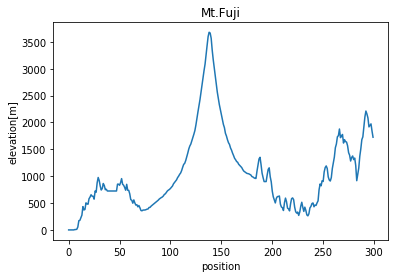

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
#x_min,x_max = fuji[:,4].min(),fuji[:,4].max()
#c = x_max/300
plt.plot(fuji[:,0],fuji[:,3])
plt.title('Mt.Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')

# 問題2

In [121]:
def calc_gradient(x_place):
    x_0 = x_place-1
    x_1 = x_place+1
    #print('x地点',x_0,x_1)
    y_0 = fuji[fuji[:,0]==x_0,3]
    y_1 = fuji[fuji[:,0]==x_1,3]
    #print('y地点',y_0,y_1)
    d_xy = (y_1-y_0)/(x_1-x_0)
    #print('勾配',d_xy)
    return d_xy
    


In [8]:
x_place=200
y = fuji[fuji[:,0]==x_place,4]
x_0 = x_place-1
x_1 = x_place+1
y_0 = fuji[fuji[:,0]==x_0,4]
y_1 = fuji[fuji[:,0]==x_1,4]

d_xy = (y_1-y_0)/(x_1-x_0)
d_xy

array([322.])

In [9]:
print("160地点の勾配：",calc_gradient(160))

160地点の勾配： [-48.27]


# 問題3

In [124]:
def move(x,alpha=0.2):
    #print('move前の地点'+str(x))
    gd = calc_gradient(x)
    #print('勾配',gd)
    x_update = np.round(x - alpha*gd)
    #print('更新後の地点',x_update)
    if x_update <= 1:
        x_update = 1
    if x_update > 298:
        x_update = 298
    return gd,x_update

# 問題4

In [17]:
def hike_mount(x_now):
    #勾配が限りなく小さくなったら停止
    x_place_list = [x_now]
    gd_list = []
    
    gd = 1000
    x_update = x_now
    i=0
    while np.abs(gd) >5:
        gra,x_update = move(x_update)
        x_place_list.append(x_update)
        gd = gra
        gd_list.append(float(gd))
        #print('gra',gra)
        #print('x_update',x_update)
        i += 1
    return x_place_list,gd_list

In [27]:
x_place_list,gd_list = hike_mount(136)
update_place = x_place_list[-1]
upd_place_grad = gd_list[-1]
print('更新後の地点:{}'.format(update_place))
print('更新後の地点の勾配:{:.3f}'.format(upd_place_grad))

更新後の地点:74.0
更新後の地点の勾配:1.140


# 問題5

In [27]:
print(fuji[:,0]==x_place_list)

False


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


[3434, 858, 700, 602, 575, 505, 458, 418, 377, 371, 371]


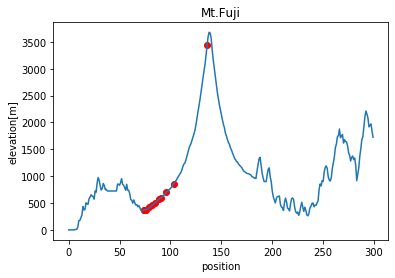

In [28]:
#断面図に地点を表示する

import matplotlib.pyplot as plt
%matplotlib inline
#x_min,x_max = fuji[:,4].min(),fuji[:,4].max()
#c = x_max/300
plt.plot(fuji[:,0],fuji[:,3])
plt.title('Mt.Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')

hyoko_list = []
for x_place in x_place_list:
    y = fuji[fuji[:,0]==x_place,3]
    hyoko_list.append(int(y))
print(list(hyoko_list))

plt.scatter(x_place_list,hyoko_list,color='red')

# 問題6 初期値の変更

In [130]:
#更新回数100回による制限にhike_mount関数を変更

def hike_mount_upd(x_now):
    #勾配が限りなく小さくなったら停止
    x_place_list = [x_now]
    gd_list = []
    
    gd = 1000
    x_update = x_now
    
    for _ in range(100):
        gra,x_update = move(x_update)
        #print(gra,x_update)
        x_place_list.append(float(x_update))
        gd = gra
        gd_list.append(float(gd))
        #print('gra',gra)
        #print('x_update',x_update)
    return x_place_list,gd_list

In [71]:
upd_places = []
upd_grads = []
for i in range(1,299):
    print('=================地点'+str(i)+'==================')
    x_place_list,gd_list = hike_mount_upd(i)
    upd_places.append(x_place_list[-1])
    upd_grads.append(gd_list[-1])
    
    
    
    

=================地点1==================
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [

y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
=================地点3==================
move前の地点3
x地点 2 4
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]


move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 

x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [

勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] [4.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [3.]
[0.] [3.]
move前の地点[3.]
x地点 [2.] 

更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 

y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]
move前の地点[2.]
x地点 [1.] [3.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [2.]
[0.] [2.]


y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
=================地点14==================
move前の地点14
x地点 13 15
y地点 [275.38] [371.74]
勾配 [48.18]
勾配 [48.18]
更新後の地点 [4.]
[48.18] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5

y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]


x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [

x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
=================地点19==================
move前の地点19
x地点 18 20
y地点 [485.39] [580.5]
勾配 [47.555]
勾配 [47.555]
更新後の地点 [9.]
[47.555] [9.]
move前の地点[9.]
x地点 [8.] [10.]
y地点 [12.2] [171.56]
勾配 [79.68]
勾配 [79.68]
更新後の地点 [-7.]
[79.68] 

勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x

y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]


勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配

y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点

x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
=================地点28==================
move前の地点28
x地点 27 29
y地点 [701.94] [976.17]
勾配 [137.115]
勾配 [137.115]
更新後の地点 [1.]
[137.115] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 

x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
move前の地点[4.]
x地点 [3.] [5.]
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [4.]
[0.] [4.]
=================地点30==================
move前の地点30
x地点 29 31
y地点 [976.17] [817.]
勾配 [-79.585]
勾配 [-79.585]
更新後の地点 [46.]
[-79.585] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46

y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [46.]
[0.] [46.]
move前の地点[46.]
x地点 [45.] [47.]
y地点 [724.5

[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]

y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点

[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]

[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]

y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5

更新後の地点 [40.]
[0.] [40.]
move前の地点[40.]
x地点 [39.] [41.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [40.]
[0.] [40.]
move前の地点[40.]
x地点 [39.] [41.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [40.]
[0.] [40.]
move前の地点[40.]
x地点 [39.] [41.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [40.]
[0.] [40.]
move前の地点[40.]
x地点 [39.] [41.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [40.]
[0.] [40.]
move前の地点[40.]
x地点 [39.] [41.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [40.]
[0.] [40.]
move前の地点[40.]
x地点 [39.] [41.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [40.]
[0.] [40.]
move前の地点[40.]
x地点 [39.] [41.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [40.]
[0.] [40.]
move前の地点[40.]
x地点 [39.] [41.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [40.]
[0.] [40.]
move前の地点[40.]
x地点 [39.] [41.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [40.]
[0.] [40.]
move前の地点[40.]
x地点 [39.] [41.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [40.]
[0.] [40.]
move前の地点[40.]
x地点 [39.] [41.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [40

x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] [42.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [41.]
[0.] [41.]
move前の地点[41.]
x地点 [40.] 

y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [42.]
[0.] [42.]
move前の地点[42.]
x地点 [41.] [43.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [42.]
[0.] [42.]
move前の地点[42.]
x地点 [41.] [43.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [42.]
[0.] [42.]
move前の地点[42.]
x地点 [41.] [43.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [42.]
[0.] [42.]
move前の地点[42.]
x地点 [41.] [43.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [42.]
[0.] [42.]
move前の地点[42.]
x地点 [41.] [43.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [42.]
[0.] [42.]
move前の地点[42.]
x地点 [41.] [43.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [42.]
[0.] [42.]
move前の地点[42.]
x地点 [41.] [43.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [42.]
[0.] [42.]
move前の地点[42.]
x地点 [41.] [43.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [42.]
[0.] [42.]
move前の地点[42.]
x地点 [41.] [43.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [42.]
[0.] [42.]
move前の地点[42.]
x地点 [41.] [43.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [42.]
[0.] [42.]
move前の地点[42.]
x地点 [41.] [43.]
y地点 [724.5

x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] [44.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [43.]
[0.] [43.]
move前の地点[43.]
x地点 [42.] 

勾配 [0.]
更新後の地点 [44.]
[0.] [44.]
move前の地点[44.]
x地点 [43.] [45.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [44.]
[0.] [44.]
move前の地点[44.]
x地点 [43.] [45.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [44.]
[0.] [44.]
move前の地点[44.]
x地点 [43.] [45.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [44.]
[0.] [44.]
move前の地点[44.]
x地点 [43.] [45.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [44.]
[0.] [44.]
move前の地点[44.]
x地点 [43.] [45.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [44.]
[0.] [44.]
move前の地点[44.]
x地点 [43.] [45.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [44.]
[0.] [44.]
move前の地点[44.]
x地点 [43.] [45.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [44.]
[0.] [44.]
move前の地点[44.]
x地点 [43.] [45.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [44.]
[0.] [44.]
move前の地点[44.]
x地点 [43.] [45.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [44.]
[0.] [44.]
move前の地点[44.]
x地点 [43.] [45.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [44.]
[0.] [44.]
move前の地点[44.]
x地点 [43.] [45.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新

[0.] [45.]
move前の地点[45.]
x地点 [44.] [46.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [45.]
[0.] [45.]
move前の地点[45.]
x地点 [44.] [46.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [45.]
[0.] [45.]
move前の地点[45.]
x地点 [44.] [46.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [45.]
[0.] [45.]
move前の地点[45.]
x地点 [44.] [46.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [45.]
[0.] [45.]
move前の地点[45.]
x地点 [44.] [46.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [45.]
[0.] [45.]
move前の地点[45.]
x地点 [44.] [46.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [45.]
[0.] [45.]
move前の地点[45.]
x地点 [44.] [46.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [45.]
[0.] [45.]
move前の地点[45.]
x地点 [44.] [46.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [45.]
[0.] [45.]
move前の地点[45.]
x地点 [44.] [46.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [45.]
[0.] [45.]
move前の地点[45.]
x地点 [44.] [46.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [45.]
[0.] [45.]
move前の地点[45.]
x地点 [44.] [46.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [45.]
[0.] [45.]

勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 

move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[39.]
x地点 [38.] [40.]
y地点 [724.5] [724.5]
勾配 [0.]
勾配 [0.]
更新後の地点 [39.]
[0.] [39.]
move前の地点[3

y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点 0 2
y地点 [0.] [0.]
勾配 [0.]
勾配 [0.]
更新後の地点 [1.]
[0.] 1
move前の地点1
x地点

x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 

[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 

x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 

y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]


x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]
[-0.335] [57.]
move前の地点[57.]
x地点 [56.] [58.]
y地点 [738.97] [738.3]
勾配 [-0.335]
勾配 [-0.335]
更新後の地点 [57.]

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] 

更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] 

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]


x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 

move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [7

更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] 

x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]


[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] 

[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
=================地点83==================
move前の地点83
x地点 82 84
y地点 [458.66] [488.4]
勾配 [14.87]
勾配 [14.87]
更新後の地点 [80.]
[14.87] [80.]
move前の地点[80.]
x地点 [79.] [81.]
y地点 [418.41] [443.]
勾配 [12.295]
勾配 [12.295]
更新後の地点 [78.]
[12.295] [78.]
move前の地点[78.]
x地点 [77.] [79.]
y地点 [386.64] [418.41]
勾配 [15.885]
勾配 [15.885]
更新後の地点 [75.]
[15.885] [75.]
move前の地点[75.]
x地点 [74.] [76.]
y地点 [371.04] [377.62]
勾配 [3.29]
勾配 [3.29]
更新後の地点 [74.]
[3.29] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
=================地点84==================
move前の地点84
x地点 83 85
y地点 [471.82] [505.1]
勾配 [16.64]
勾配 [16.64]
更新後の地点 [81.]
[16.64] [81.]
m

勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]


y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

[1.14] [74.]
=================地点87==================
move前の地点87
x地点 86 88
y地点 [519.54] [553.64]
勾配 [17.05]
勾配 [17.05]
更新後の地点 [84.]
[17.05] [84.]
move前の地点[84.]
x地点 [83.] [85.]
y地点 [471.82] [505.1]
勾配 [16.64]
勾配 [16.64]
更新後の地点 [81.]
[16.64] [81.]
move前の地点[81.]
x地点 [80.] [82.]
y地点 [420.6] [458.66]
勾配 [19.03]
勾配 [19.03]
更新後の地点 [77.]
[19.03] [77.]
move前の地点[77.]
x地点 [76.] [78.]
y地点 [377.62] [390.14]
勾配 [6.26]
勾配 [6.26]
更新後の地点 [76.]
[6.26] [76.]
move前の地点[76.]
x地点 [75.] [77.]
y地点 [371.19] [386.64]
勾配 [7.725]
勾配 [7.725]
更新後の地点 [74.]
[7.725] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配

[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [7

勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
=================地点91==================
move前の地点91
x地点 90 92
y地点 [588.99] [613.04]
勾配 [12.025]
勾配 [12.025]
更新後の地点 [89.]
[12.025] [89.]
move前の地点[89.]
x地点 [88.] [90.]
y地点 [553.64] [588.99]
勾配 [17.675]
勾配 [17.675]
更新後の地点 [85.]
[17.675] [85.]
move前の地点[85.]
x地点 [84.] [86.]
y地点 [488.4] [519.54]
勾配 [15.57]
勾配 [15.57]
更新後の地点 [82.]
[15.57] [82.]
move前の地点[82.]
x地点 [81.] [83.]
y地点 [443.] [471.82]
勾配 [14.41]
勾配 [14.41]
更新後の地点 [79.]
[14.41] [79.]
move前の地点[79.]
x地点 [78.] [8

[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [7

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]


[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
=================地点99==================
move前の地点99
x地点 98 100
y地点 [741.17] [772.58]
勾配 [15.705]
勾配 [15.705]
更新後の地点 [96.]
[15.705] [96.]
move前の地点[96.]
x地点 [95.] [97.]
y地点 [672.36] [725.72]
勾配 [26.68]
勾配 [26.68]
更新後の地点 [91.]
[26.68] [91.]
move前の地点[91.]
x地点 [90.] [92.]
y地点 [588.99] [613.04]
勾配 [12.025]
勾配 [12.025]
更新後の地点 [89.]
[12.025] [89.]
move前の地点[89.]
x地点 [88.] [

勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]


y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 

move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [7

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [7

[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]


x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 

[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [7

x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] 

更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] 

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74

[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 

move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [7

x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
=================地点128============

y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19

[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
=================地点131==================
move前の地点131
x地点 130 132
y地点 [2563.4] [2825.55]
勾配 [131.075]
勾配 [131.075]
更新後の地点 [105.]
[131.075] [105.]
move前の地点[105.]
x地点 [104.] [106.]
y地点 [883.89] [932.74]
勾配 [24.425]
勾配 [24.425]
更新後の地点 [100.]
[24.425] [100.]
move前の地点[100.]
x地点 [99.] [101.]
y地点 [753.68] [795.25]
勾配 [20.785]
勾配 [20.785]
更新後の地点 [96.]
[20.785] [96.]
move前の地点[96.]
x地点 [95.] [97.]
y地点 [672.36] [725.72]
勾配 [26.68]
勾配 [26.68]
更新後の地点 [91.]
[26.68] [91.]
move前の地点[91.]
x地点 [90.] [92.]
y地点 [588.99] [613.04]
勾配 [12.025]
勾配 [12.025]
更新後の地点 [89.]
[12.025] [89.]
move前の地点[89.]
x地点 [88.] [90.]


勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]


勾配 [17.675]
更新後の地点 [85.]
[17.675] [85.]
move前の地点[85.]
x地点 [84.] [86.]
y地点 [488.4] [519.54]
勾配 [15.57]
勾配 [15.57]
更新後の地点 [82.]
[15.57] [82.]
move前の地点[82.]
x地点 [81.] [83.]
y地点 [443.] [471.82]
勾配 [14.41]
勾配 [14.41]
更新後の地点 [79.]
[14.41] [79.]
move前の地点[79.]
x地点 [78.] [80.]
y地点 [390.14] [420.6]
勾配 [15.23]
勾配 [15.23]
更新後の地点 [76.]
[15.23] [76.]
move前の地点[76.]
x地点 [75.] [77.]
y地点 [371.19] [386.64]
勾配 [7.725]
勾配 [7.725]
更新後の地点 [74.]
[7.725] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14

勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]


x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 

x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 [368.91] [371.19]
勾配 [1.14]
勾配 [1.14]
更新後の地点 [74.]
[1.14] [74.]
move前の地点[74.]
x地点 [73.] [75.]
y地点 

x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [1

y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
=================地点141==================
move前の地点141
x地点 140 142
y地点 [3567.76] [3171.53]
勾配 [-198.115]
勾配 [-198.115]
更新後の地点 [181.]
[-198.115] [181.]
move前の地点[181.]
x地点 [180.] [182.]
y地点 [993.63] [970.58]
勾配 [-11.525]
勾配 [-11.525]
更新後の地点 [183.]
[-11.525] [183.]
move前の地点[183.]
x地点 [182.] [184.]
y地点 [970.58] [958.44]
勾配 [-6.07]
勾配 [-6.07]
更新後の地点 [184.]
[-6.07] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点

[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [

x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [17

y地点 [1068.05] [1049.33]
勾配 [-9.36]
勾配 [-9.36]
更新後の地点 [177.]
[-9.36] [177.]
move前の地点[177.]
x地点 [176.] [178.]
y地点 [1049.33] [1033.52]
勾配 [-7.905]
勾配 [-7.905]
更新後の地点 [179.]
[-7.905] [179.]
move前の地点[179.]
x地点 [178.] [180.]
y地点 [1033.52] [993.63]
勾配 [-19.945]
勾配 [-19.945]
更新後の地点 [183.]
[-19.945] [183.]
move前の地点[183.]
x地点 [182.] [184.]
y地点 [970.58] [958.44]
勾配 [-6.07]
勾配 [-6.07]
更新後の地点 [184.]
[-6.07] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [

move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.

[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [

更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [17

勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.9

x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.

勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.2

勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.

x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] 

勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.9

y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52

move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[18

y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52

y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85]

勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]


move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[18

move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地

[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
=================地点161==================
move前の地点161
x地点 160 162
y地点 [1484.72] [1384.07]
勾配 [-50.325]
勾配 [-50.325]
更新後の地点 [171.]
[-50.325] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]


勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]


x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [17

勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.2

y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043

y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043

更新後の地点 [178.]
[-32.56] [178.]
=================地点166==================
move前の地点166
x地点 165 167
y地点 [1272.98] [1222.48]
勾配 [-25.25]
勾配 [-25.25]
更新後の地点 [171.]
[-25.25] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28

[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [

勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]

y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85]

x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [1

y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52

[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [

更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
=================地点172==================
move前の地点172
x地点 171 173
y地点 [1124.83] [1081.07]
勾配 [-21.88]
勾配 [-21.88]
更新後の地点 [176.]
[-21.88] [176.]
move前の地点[176.]
x地点 [175.] [177.]
y地点 [1053.28] [1043.91]
勾

更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.

勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.9

勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.2

x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [17

勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.

更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [

勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.2

y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [10

更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [17

[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [

move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.

y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52

更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.

勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
=================地点186==================
move前の地点186
x地点 185 187
y地点 [1094.28] [1321.2]
勾配 [113.46]
勾配 [113.46]
更新後の地点 [163.]
[113.46] [163.]
move前の地点[163.]
x地点 [162.] [164.]
y地点 [1384.07] [1306.46]
勾配 [-38.805]
勾配 [-38.805]
更新後の地点 [171.]
[-38.805] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [10

[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [

[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171

y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.3

x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]

x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
=================地点191==================
move前の地点191
x地点 190 192
y地点 [1056.99] [900.]
勾配 [-78.495]
勾配 [-78.495]
更新後の地点 [207.]
[-78.495] [207

勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-

move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 

[0.] [193.]
move前の地点[193.]
x地点 [192.] [194.]
y地点 [900.] [900.]
勾配 [0.]
勾配 [0.]
更新後の地点 [193.]
[0.] [193.]
move前の地点[193.]
x地点 [192.] [194.]
y地点 [900.] [900.]
勾配 [0.]
勾配 [0.]
更新後の地点 [193.]
[0.] [193.]
move前の地点[193.]
x地点 [192.] [194.]
y地点 [900.] [900.]
勾配 [0.]
勾配 [0.]
更新後の地点 [193.]
[0.] [193.]
move前の地点[193.]
x地点 [192.] [194.]
y地点 [900.] [900.]
勾配 [0.]
勾配 [0.]
更新後の地点 [193.]
[0.] [193.]
move前の地点[193.]
x地点 [192.] [194.]
y地点 [900.] [900.]
勾配 [0.]
勾配 [0.]
更新後の地点 [193.]
[0.] [193.]
move前の地点[193.]
x地点 [192.] [194.]
y地点 [900.] [900.]
勾配 [0.]
勾配 [0.]
更新後の地点 [193.]
[0.] [193.]
move前の地点[193.]
x地点 [192.] [194.]
y地点 [900.] [900.]
勾配 [0.]
勾配 [0.]
更新後の地点 [193.]
[0.] [193.]
move前の地点[193.]
x地点 [192.] [194.]
y地点 [900.] [900.]
勾配 [0.]
勾配 [0.]
更新後の地点 [193.]
[0.] [193.]
move前の地点[193.]
x地点 [192.] [194.]
y地点 [900.] [900.]
勾配 [0.]
勾配 [0.]
更新後の地点 [193.]
[0.] [193.]
move前の地点[193.]
x地点 [192.] [194.]
y地点 [900.] [900.]
勾配 [0.]
勾配 [0.]
更新後の地点 [193.]
[0.] [193.]
move前の地点[193.]
x地点 [192.] [194.]
y地点 [900.] [900.]
勾配 [0.]

勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]

x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] 

y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52

[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
=================地点197==================
move前の地点197
x地点 196 198
y地点 [1126.56] [990.05]
勾配 [-68.255]
勾配 

[-57.3] [213.]
move前の地点[213.]
x地点 [212.] [214.]
y地点 [505.42] [526.51]
勾配 [10.545]
勾配 [10.545]
更新後の地点 [211.]
[10.545] [211.]
move前の地点[211.]
x地点 [210.] [212.]
y地点 [413.4] [505.42]
勾配 [46.01]
勾配 [46.01]
更新後の地点 [202.]
[46.01] [202.]
move前の地点[202.]
x地点 [201.] [203.]
y地点 [616.85] [502.25]
勾配 [-57.3]
勾配 [-57.3]
更新後の地点 [213.]
[-57.3] [213.]
move前の地点[213.]
x地点 [212.] [214.]
y地点 [505.42] [526.51]
勾配 [10.545]
勾配 [10.545]
更新後の地点 [211.]
[10.545] [211.]
move前の地点[211.]
x地点 [210.] [212.]
y地点 [413.4] [505.42]
勾配 [46.01]
勾配 [46.01]
更新後の地点 [202.]
[46.01] [202.]
move前の地点[202.]
x地点 [201.] [203.]
y地点 [616.85] [502.25]
勾配 [-57.3]
勾配 [-57.3]
更新後の地点 [213.]
[-57.3] [213.]
move前の地点[213.]
x地点 [212.] [214.]
y地点 [505.42] [526.51]
勾配 [10.545]
勾配 [10.545]
更新後の地点 [211.]
[10.545] [211.]
move前の地点[211.]
x地点 [210.] [212.]
y地点 [413.4] [505.42]
勾配 [46.01]
勾配 [46.01]
更新後の地点 [202.]
[46.01] [202.]
move前の地点[202.]
x地点 [201.] [203.]
y地点 [616.85] [502.25]
勾配 [-57.3]
勾配 [-57.3]
更新後の地点 [213.]
[-57.3] [213.]
move前の地点[213.]
x地点 [212.]

[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [

x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y

move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x

[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171

x地点 [201.] [203.]
y地点 [616.85] [502.25]
勾配 [-57.3]
勾配 [-57.3]
更新後の地点 [213.]
[-57.3] [213.]
move前の地点[213.]
x地点 [212.] [214.]
y地点 [505.42] [526.51]
勾配 [10.545]
勾配 [10.545]
更新後の地点 [211.]
[10.545] [211.]
move前の地点[211.]
x地点 [210.] [212.]
y地点 [413.4] [505.42]
勾配 [46.01]
勾配 [46.01]
更新後の地点 [202.]
[46.01] [202.]
move前の地点[202.]
x地点 [201.] [203.]
y地点 [616.85] [502.25]
勾配 [-57.3]
勾配 [-57.3]
更新後の地点 [213.]
[-57.3] [213.]
move前の地点[213.]
x地点 [212.] [214.]
y地点 [505.42] [526.51]
勾配 [10.545]
勾配 [10.545]
更新後の地点 [211.]
[10.545] [211.]
move前の地点[211.]
x地点 [210.] [212.]
y地点 [413.4] [505.42]
勾配 [46.01]
勾配 [46.01]
更新後の地点 [202.]
[46.01] [202.]
move前の地点[202.]
x地点 [201.] [203.]
y地点 [616.85] [502.25]
勾配 [-57.3]
勾配 [-57.3]
更新後の地点 [213.]
[-57.3] [213.]
move前の地点[213.]
x地点 [212.] [214.]
y地点 [505.42] [526.51]
勾配 [10.545]
勾配 [10.545]
更新後の地点 [211.]
[10.545] [211.]
move前の地点[211.]
x地点 [210.] [212.]
y地点 [413.4] [505.42]
勾配 [46.01]
勾配 [46.01]
更新後の地点 [202.]
[46.01] [202.]
move前の地点[202.]
x地点 [201.] [203.]
y地点 [616.85] [502.25]


勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更

y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.3

勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]

[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [

[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.

勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [4

勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更

x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
=================地点210==================
move前の地点210
x地点 209 211
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地

move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 

y地点 [616.85] [502.25]
勾配 [-57.3]
勾配 [-57.3]
更新後の地点 [213.]
[-57.3] [213.]
move前の地点[213.]
x地点 [212.] [214.]
y地点 [505.42] [526.51]
勾配 [10.545]
勾配 [10.545]
更新後の地点 [211.]
[10.545] [211.]
move前の地点[211.]
x地点 [210.] [212.]
y地点 [413.4] [505.42]
勾配 [46.01]
勾配 [46.01]
更新後の地点 [202.]
[46.01] [202.]
move前の地点[202.]
x地点 [201.] [203.]
y地点 [616.85] [502.25]
勾配 [-57.3]
勾配 [-57.3]
更新後の地点 [213.]
[-57.3] [213.]
move前の地点[213.]
x地点 [212.] [214.]
y地点 [505.42] [526.51]
勾配 [10.545]
勾配 [10.545]
更新後の地点 [211.]
[10.545] [211.]
move前の地点[211.]
x地点 [210.] [212.]
y地点 [413.4] [505.42]
勾配 [46.01]
勾配 [46.01]
更新後の地点 [202.]
[46.01] [202.]
move前の地点[202.]
x地点 [201.] [203.]
y地点 [616.85] [502.25]
勾配 [-57.3]
勾配 [-57.3]
更新後の地点 [213.]
[-57.3] [213.]
move前の地点[213.]
x地点 [212.] [214.]
y地点 [505.42] [526.51]
勾配 [10.545]
勾配 [10.545]
更新後の地点 [211.]
[10.545] [211.]
move前の地点[211.]
x地点 [210.] [212.]
y地点 [413.4] [505.42]
勾配 [46.01]
勾配 [46.01]
更新後の地点 [202.]
[46.01] [202.]
move前の地点[202.]
x地点 [201.] [203.]
y地点 [616.85] [502.25]
勾配 [-57.3]
勾配 [-57

更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [

勾配 [-57.3]
勾配 [-57.3]
更新後の地点 [213.]
[-57.3] [213.]
move前の地点[213.]
x地点 [212.] [214.]
y地点 [505.42] [526.51]
勾配 [10.545]
勾配 [10.545]
更新後の地点 [211.]
[10.545] [211.]
move前の地点[211.]
x地点 [210.] [212.]
y地点 [413.4] [505.42]
勾配 [46.01]
勾配 [46.01]
更新後の地点 [202.]
[46.01] [202.]
move前の地点[202.]
x地点 [201.] [203.]
y地点 [616.85] [502.25]
勾配 [-57.3]
勾配 [-57.3]
更新後の地点 [213.]
[-57.3] [213.]
move前の地点[213.]
x地点 [212.] [214.]
y地点 [505.42] [526.51]
勾配 [10.545]
勾配 [10.545]
更新後の地点 [211.]
[10.545] [211.]
move前の地点[211.]
x地点 [210.] [212.]
y地点 [413.4] [505.42]
勾配 [46.01]
勾配 [46.01]
更新後の地点 [202.]
[46.01] [202.]
move前の地点[202.]
x地点 [201.] [203.]
y地点 [616.85] [502.25]
勾配 [-57.3]
勾配 [-57.3]
更新後の地点 [213.]
[-57.3] [213.]
move前の地点[213.]
x地点 [212.] [214.]
y地点 [505.42] [526.51]
勾配 [10.545]
勾配 [10.545]
更新後の地点 [211.]
[10.545] [211.]
move前の地点[211.]
x地点 [210.] [212.]
y地点 [413.4] [505.42]
勾配 [46.01]
勾配 [46.01]
更新後の地点 [202.]
[46.01] [202.]
move前の地点[202.]
x地点 [201.] [203.]
y地点 [616.85] [502.25]
勾配 [-57.3]
勾配 [-57.3]
更新後の地点 [213.]
[-57

x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218

勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 

y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430

勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後

x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
=================地点218==================
move前の地点218
x地点 217 219
y地点 [354.39] [582.16]
勾配 [113.885]
勾配 [113.885]
更新後の地点 [195.]
[113.885] [195.]
move前の地点[195.]
x地点 [194.] [196.]
y地点 [900.] [1126.56]
勾配 [113.28]
勾配 [113.28]
更新後の地点 [172.]
[113.28] [172.]
move前の地点[172.]
x地点 [171.] [173.]
y地点 [1124.83] [1081.07]
勾配 [-21.88]
勾配 [-21.88]
更新後の地点 [176.]
[-21.88] [176.]
m

勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]
勾配 [66.88]
更新後の地点 [171.]
[66.88] [171.]
move前の地点[171.]
x地点 [170.] [172.]
y地点 [1160.85] [1095.73]
勾配 [-32.56]
勾配 [-32.56]
更新後の地点 [178.]
[-32.56] [178.]
move前の地点[178.]
x地点 [177.] [179.]
y地点 [1043.91] [1022.1]
勾配 [-10.905]
勾配 [-10.905]
更新後の地点 [180.]
[-10.905] [180.]
move前の地点[180.]
x地点 [179.] [181.]
y地点 [1022.1] [985.66]
勾配 [-18.22]
勾配 [-18.22]
更新後の地点 [184.]
[-18.22] [184.]
move前の地点[184.]
x地点 [183.] [185.]
y地点 [960.52] [1094.28]
勾配 [66.88]

[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.

勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 

[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
m

move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]


更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89

x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]

move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77

勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
=================地点226==================
move前の地点226
x地点 225 227
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [2

x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y地点 [332.88] [332.39]
勾配 [-0.245]
勾配 [-0.245]
更新後の地点 [226.]
[-0.245] [226.]
move前の地点[226.]
x地点 [225.] [227.]
y

y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [39

x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.

y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
mov

勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.5

x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]

move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x

y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
=================地点233==================
move前の地点233

勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾

[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228

y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]


勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 

[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
mov

x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.

x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y

更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]


勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
=================地点241==================
move前の地点241
x地点 240 242
y地点 [501.97] [462.99]
勾配 [-19.49]
勾配 [-19.49]
更新後の地点 [245.]
[-19.49] [245.]
move前の地点[245.]
x地点 [244.] [246.]
y地点 [502.93] [749.2

勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地

x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.

勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [4

勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 

勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.5

x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [

勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更

x地点 [243.] [245.]
y地点 [456.1] [542.]
勾配 [42.95]
勾配 [42.95]
更新後の地点 [235.]
[42.95] [235.]
move前の地点[235.]
x地点 [234.] [236.]
y地点 [278.95] [301.]
勾配 [11.025]
勾配 [11.025]
更新後の地点 [233.]
[11.025] [233.]
move前の地点[233.]
x地点 [232.] [234.]
y地点 [423.72] [278.95]
勾配 [-72.385]
勾配 [-72.385]
更新後の地点 [247.]
[-72.385] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [

move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
=================地点251==================
move前の地点251
x地点 250 252
y地点 [901.57] [1161.14]
勾配 [129.785]
勾配 [129.785]
更新後の地点 [225.]
[129.785] [225.]
move前の地点[225.]
x地点 [224.] [226.]
y地点 [312.76] [270.33]
勾配 [-21.215]
勾配 [-21.215]
更新後の地点 [229.]
[-21.215] [229.]
move前の地点[229.]
x地点 [228.] [230.]
y地点 [440.61] [422.18]
勾配 [-9.215]
勾配 [-9.215]
更新後の地点 [231.]

[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
mov

[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
mov

更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
=================地点254==================
move前の地点254
x地点 253 255
y地点 [1191.05] [986.58]
勾配 [-102.235]
勾配 [-102.235]
更新後の地点 [274.]
[-102.235] [274.]
move前の地点[274.]
x地点 [273.] [275.]
y地点 [1635.28] [1438.39]
勾配 [-98.445]
勾配 [-98.445]
更新後の地点 [294.]
[-98.445] [294.]
move前の地点[294.]
x地点 [293.] [295.]
y地点 [2158.71] [1918.24]
勾配 [-120.235]
勾配 [-120.235]
更新後の地点 [318.]
[-120.235] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.0

x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更

勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 

x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [2

更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.

勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点

y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.4

x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.

x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.

y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.4

更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71

y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
mov

y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07]

y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [49

x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.

move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x

x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [

y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430

x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [2

更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.9

勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地

x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.

[42.95] [235.]
move前の地点[235.]
x地点 [234.] [236.]
y地点 [278.95] [301.]
勾配 [11.025]
勾配 [11.025]
更新後の地点 [233.]
[11.025] [233.]
move前の地点[233.]
x地点 [232.] [234.]
y地点 [423.72] [278.95]
勾配 [-72.385]
勾配 [-72.385]
更新後の地点 [247.]
[-72.385] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の

勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 2

[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配

x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.

move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x

勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地

x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更

x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.

y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [39

y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430

勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-

[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
m

move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77]
更新後の地点 [231.]
[0.77] [231.]
move前の地点[231.]
x地点 [230.] [232.]
y地点 [422.18] [423.72]
勾配 [0.77]
勾配 [0.77

y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [49

勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
=================地点292==================
move前の地点292
x地点 291 293
y地点 [2102.67] [2158

[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430.96]
勾配 [-30.04]
勾配 [-30.04]
更新後の地点 [246.]
[-30.04] [246.]
move前の地点[246.]
x地点 [245.] [247.]
y地点 [542.] [855.15]
勾配 [156.575]
勾配 [156.575]
更新後の地点 [215.]
[156.575] [215.]
move前の地点[215.]
x地点 [214.] [216.]
y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228

y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]

勾配 [-69.94]
勾配 [-69.94]
更新後の地点 [309.]
[-69.94] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x

y地点 [526.51] [391.72]
勾配 [-67.395]
勾配 [-67.395]
更新後の地点 [228.]
[-67.395] [228.]
move前の地点[228.]
x地点 [227.] [229.]
y地点 [332.39] [514.97]
勾配 [91.29]
勾配 [91.29]
更新後の地点 [210.]
[91.29] [210.]
move前の地点[210.]
x地点 [209.] [211.]
y地点 [427.07] [361.49]
勾配 [-32.79]
勾配 [-32.79]
更新後の地点 [217.]
[-32.79] [217.]
move前の地点[217.]
x地点 [216.] [218.]
y地点 [391.72] [487.5]
勾配 [47.89]
勾配 [47.89]
更新後の地点 [207.]
[47.89] [207.]
move前の地点[207.]
x地点 [206.] [208.]
y地点 [622.89] [479.68]
勾配 [-71.605]
勾配 [-71.605]
更新後の地点 [221.]
[-71.605] [221.]
move前の地点[221.]
x地点 [220.] [222.]
y地点 [595.53] [425.04]
勾配 [-85.245]
勾配 [-85.245]
更新後の地点 [238.]
[-85.245] [238.]
move前の地点[238.]
x地点 [237.] [239.]
y地点 [409.72] [491.04]
勾配 [40.66]
勾配 [40.66]
更新後の地点 [230.]
[40.66] [230.]
move前の地点[230.]
x地点 [229.] [231.]
y地点 [514.97] [344.44]
勾配 [-85.265]
勾配 [-85.265]
更新後の地点 [247.]
[-85.265] [247.]
move前の地点[247.]
x地点 [246.] [248.]
y地点 [749.23] [821.32]
勾配 [36.045]
勾配 [36.045]
更新後の地点 [240.]
[36.045] [240.]
move前の地点[240.]
x地点 [239.] [241.]
y地点 [491.04] [430

[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配 [-124.095]
勾配 [-124.095]
更新後の地点 [323.]
[-124.095] 298
move前の地点298
x地点 297 299
y地点 [1973.99] [1725.8]
勾配

In [76]:
#0地点と300地点の勾配が計算できないため、1-299地点を初期値として
#山下りした結果最終的にたどり着いた地点とその勾配がupd_places,
#upd_gradsに格納されている

#地点1=２データ目
#地点298=299データ目

print(len(upd_places))
print(len(upd_grads))

298
298


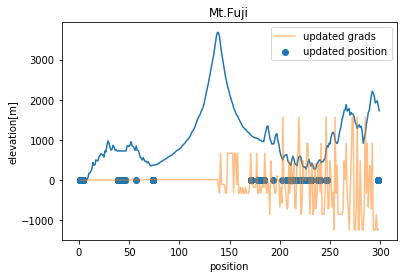

In [94]:
y = np.zeros(298)
plt.plot(fuji[:,0],fuji[:,3])
plt.title('Mt.Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.scatter(upd_places,y,label='updated position')
plt.plot(np.arange(1,299),np.array(upd_grads)*10,
         alpha=0.5,label='updated grad')
plt.legend()

updated positionは最終的にたどり着いた地点<br>
updated gradsはその地点から山下りをはじめ、最終的にたどり着いた地点の勾配を表している

富士山の左側を初期値とした場合、勾配が0の地点に収束している一方で、
富士山の右側を初期値とした場合、勾配が収束していないことがわかる。
また、最終的にたどり着くポジションは初期値を山の右側と左側のどちらにおくかで大きく別れることがわかる

In [127]:
#40,150,270を初期値とした際の地点更新経過をプロット

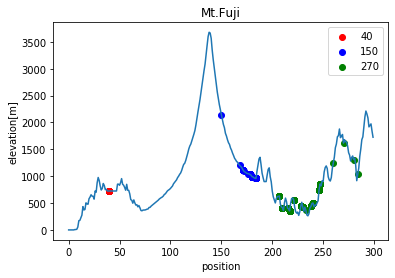

In [126]:
plt.plot(fuji[:,0],fuji[:,3])
plt.title('Mt.Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')

x_place_list_40,gd_list_40 = hike_mount_upd(40)
x_place_list_150,gd_list_150 = hike_mount_upd(150)
x_place_list_270,gd_list_270 = hike_mount_upd(270)

hyoko_list_40 = []
hyoko_list_150 = []
hyoko_list_270 = []
x_place_lists = [x_place_list_40,x_place_list_150,x_place_list_270]
hyoko_lists = [hyoko_list_40,hyoko_list_150,hyoko_list_270]
colors=('red','blue','green')
starts = [40,150,270]
for start, x_place_list,c,hyoko_list in zip(starts,
                                            x_place_lists,colors,hyoko_lists):
    for x_place in (x_place_list):
        #print('x_place:',x_place)
        y = fuji[fuji[:,0]==x_place,3]
        #print('y',y)
        hyoko_list.append(int(y))
    #print(list(hyoko_list))
    #print('hyoko_list',len(hyoko_list))
    #print('x_place_list',len(x_place_list))
    plt.scatter(x_place_list,hyoko_list,color=c,label=str(start))
plt.legend()